In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from thinning import sample_hawkes_process_thinning, sample_hawkes_process_thinning_vectorised, sample_hawkes_process_thinning_true_vectorised
from utils import exp_kernel, constant_background, plot_counting_process, exp_kernel_vectorised
from time_rescaling import rescale_times
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process, simulate_immigrants, simulate_offspring, produce_cluster, sample_hawkes_process_clustering, cluster_plot

In [3]:
from utils import conditional_intensity, conditional_intensity_vectorised, conditional_intensity_true_vectorised
import time

In [4]:
T_list = [1,2,2.4]

In [5]:
t1 = time.time()
print(conditional_intensity(2, T_list, exp_kernel_vectorised, constant_background))
t2 = time.time()
print(conditional_intensity_vectorised(2.0, T_list, exp_kernel_vectorised, constant_background))
t3 = time.time()
print(conditional_intensity_true_vectorised(np.array([2]), T_list, exp_kernel_vectorised, constant_background))
t4 = time.time()

print(t2-t1, t3-t2, t4-t3)

1.0183156388887342
1.0183156388887342
1.0183156388887342
0.0 0.0 0.0


In [6]:
t_vals = np.linspace(0,10, 1000)

In [7]:
cond_intensity = conditional_intensity_true_vectorised(t_vals, T_list, constant_background, exp_kernel_vectorised)

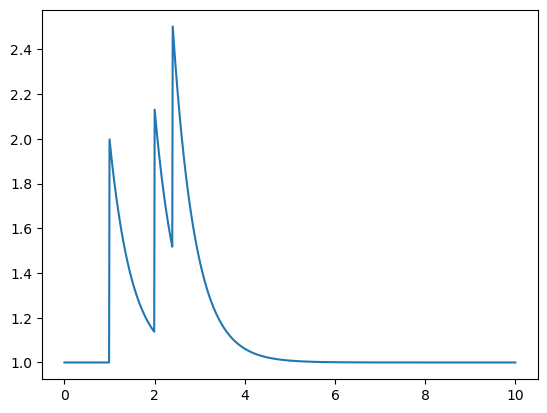

In [8]:
plt.plot(t_vals, cond_intensity)

In [9]:
cond_intensity.shape

(1000,)

In [10]:
# t_vals = np.array([1,2])
t_vals = np.linspace(0,10,100)
events_list = [1,2,3]

cond_intensity = conditional_intensity_true_vectorised(np.array(t_vals), events_list, constant_background, exp_kernel_vectorised)

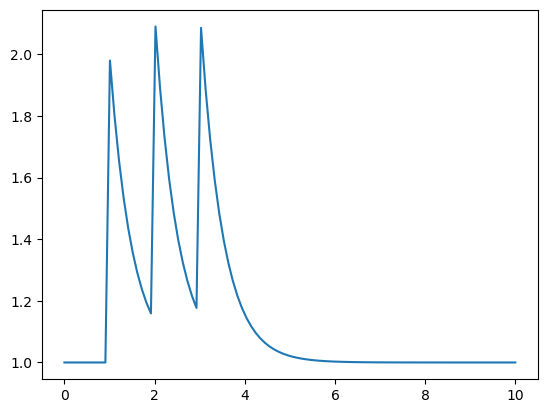

In [11]:
plt.plot(t_vals, cond_intensity)

Now check thinning sampling.

In [12]:
sample_hawkes_process_thinning(10, constant_background, exp_kernel_vectorised)

[0.23090072985937,
 0.308900373603348,
 1.6113907553265376,
 6.0179928393656485,
 6.183500244004042,
 6.4440005041762864,
 6.497200969429798,
 6.731060770196834,
 6.912926808115705,
 7.037966597610016,
 8.86263232615243,
 9.126336328045445,
 9.25482286504796,
 9.331483994835887,
 9.446623669586005,
 9.500010536427398,
 9.500154477967302,
 9.620027133662258,
 9.670837036203793,
 10.214943658802126]

In [13]:
sample_hawkes_process_thinning_vectorised(10, constant_background, exp_kernel_vectorised)

[1.1912815075405168,
 1.796481635221828,
 3.283853913172671,
 6.296673606545989,
 6.849358057730469,
 8.45527855937072,
 10.097985493873159]

In [14]:
sample_hawkes_process_thinning_true_vectorised(10, constant_background, exp_kernel_vectorised)

[0.48537891738475736,
 0.5779692823902806,
 0.724539515451196,
 2.2650688943463884,
 2.602126788098734,
 2.6781367898756594,
 2.7657067933206574,
 3.1196274320561708,
 3.6132549214631267,
 3.9308509349676672,
 7.917289041356937,
 8.311479341255966,
 9.106828450639478,
 9.961231022177753,
 10.070047546663004]

In [17]:
max_T = 100
num_samples = 250

t1 = time.time()
for i in range(num_samples):
    sample_hawkes_process_thinning(max_T, constant_background, exp_kernel_vectorised)
t2 = time.time()
for i in range(num_samples):
    sample_hawkes_process_thinning_vectorised(max_T, constant_background, exp_kernel_vectorised)
t3 = time.time()
for i in range(num_samples):
    sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
t4 = time.time()

print(t2-t1, t3-t2, t4-t3)

6.144403696060181 21.634671449661255 4.415700435638428


Nice - for max_T=10, non-vectorised is fastest, but increasing max_T to 100 we see true_vectorised is already winning (and verify that 'vectorised' was not actually an improvement on normal method).

In [18]:
max_T = 1000
num_samples = 100

t1 = time.time()
for i in range(num_samples):
    sample_hawkes_process_thinning(max_T, constant_background, exp_kernel_vectorised)
t2 = time.time()

t3 = time.time()
for i in range(num_samples):
    sample_hawkes_process_thinning_true_vectorised(max_T, constant_background, exp_kernel_vectorised)
t4 = time.time()

print(t2-t1, t4-t3)

465.0617005825043 48.93493723869324


In [ ]:
# Output of above (took 8 mins)
# 465.0617005825043 48.93493723869324